In [68]:
# Importing various Libraries
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import itertools

%matplotlib inline
sns.set(rc={'figure.figsize':(8,7)})

In [69]:
df = pd.read_csv('train.csv')
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [70]:
df.drop('id', axis=1, inplace=True)
df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1         28.0                   0   > 2 Years   
1    Male   76                1          3.0                   0    1-2 Year   
2    Male   47                1         28.0                   0   > 2 Years   
3    Male   21                1         11.0                   1    < 1 Year   
4  Female   29                1         41.0                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes         40454.0                  26.0      217         1  
1             No         33536.0                  26.0      183         0  
2            Yes         38294.0                  26.0       27         1  
3             No         28619.0                 152.0      203         0  
4             No         27496.0                 152.0       39         0

In [71]:
np.unique(df['Vehicle_Age'], return_counts=True)

(array(['1-2 Year', '< 1 Year', '> 2 Years'], dtype=object),
 array([200316, 164786,  16007]))

In [72]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [73]:
one_hot_encoder = OneHotEncoder()

In [74]:
df=pd.concat([df,pd.get_dummies(df['Vehicle_Age'],prefix='Vehicle_Age')],axis=1).drop(['Vehicle_Age'],axis=1)
df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0    Male   44                1         28.0                   0   
1    Male   76                1          3.0                   0   
2    Male   47                1         28.0                   0   
3    Male   21                1         11.0                   1   
4  Female   29                1         41.0                   1   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  \
0            Yes         40454.0                  26.0      217         1   
1             No         33536.0                  26.0      183         0   
2            Yes         38294.0                  26.0       27         1   
3             No         28619.0                 152.0      203         0   
4             No         27496.0                 152.0       39         0   

   Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  
0                     0                     0                      1  
1                     1                     0                      0  
2                     0                     0                      1  
3                     0                     1                      0  
4                     0                     1                      0

In [75]:
df.isna().sum()

Gender                   0
Age                      0
Driving_License          0
Region_Code              0
Previously_Insured       0
Vehicle_Damage           0
Annual_Premium           0
Policy_Sales_Channel     0
Vintage                  0
Response                 0
Vehicle_Age_1-2 Year     0
Vehicle_Age_< 1 Year     0
Vehicle_Age_> 2 Years    0
dtype: int64

In [76]:
mapValue = {
    'Male':0,
    'Female':1
}

df["Gender"] = df['Gender'].map(mapValue).astype(int)

In [77]:
mapValue = {
    'No':0,
    'Yes':1
}

df["Vehicle_Damage"] = df['Vehicle_Damage'].map(mapValue).astype(int)

In [78]:
list(df.select_dtypes(['object']).columns)

[]

In [79]:
df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       0   44                1         28.0                   0   
1       0   76                1          3.0                   0   
2       0   47                1         28.0                   0   
3       0   21                1         11.0                   1   
4       1   29                1         41.0                   1   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  \
0               1         40454.0                  26.0      217         1   
1               0         33536.0                  26.0      183         0   
2               1         38294.0                  26.0       27         1   
3               0         28619.0                 152.0      203         0   
4               0         27496.0                 152.0       39         0   

   Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  
0                     0                     0                      1  
1                     1                     0                      0  
2                     0                     0                      1  
3                     0                     1                      0  
4                     0                     1                      0

In [80]:
df_header_list = list(df.columns.values)
df_header_list

['Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response',
 'Vehicle_Age_1-2 Year',
 'Vehicle_Age_< 1 Year',
 'Vehicle_Age_> 2 Years']

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
x = df.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = df_header_list

In [83]:
df.head()

Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0     0.0  0.369231              1.0     0.538462                 0.0   
1     0.0  0.861538              1.0     0.057692                 0.0   
2     0.0  0.415385              1.0     0.538462                 0.0   
3     0.0  0.015385              1.0     0.211538                 1.0   
4     1.0  0.138462              1.0     0.788462                 1.0   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel   Vintage  Response  \
0             1.0        0.070366              0.154321  0.716263       1.0   
1             0.0        0.057496              0.154321  0.598616       0.0   
2             1.0        0.066347              0.154321  0.058824       1.0   
3             0.0        0.048348              0.932099  0.667820       0.0   
4             0.0        0.046259              0.932099  0.100346       0.0   

   Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  
0                   0.0                   0.0                    1.0  
1                   1.0                   0.0                    0.0  
2                   0.0                   0.0                    1.0  
3                   0.0                   1.0                    0.0  
4                   0.0                   1.0                    0.0

In [84]:
### Defines a function which will eliminate highly correlated columns and draw the heat map of the correlation matrix
def eliminate_corr_columns(df):
    corr_matrix = df.corr().abs()
    sns.heatmap(corr_matrix)
    upper_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper_matrix.columns if any(upper_matrix[column] > 0.8)]
    df_new = df.drop(to_drop, axis=1)
    return df_new

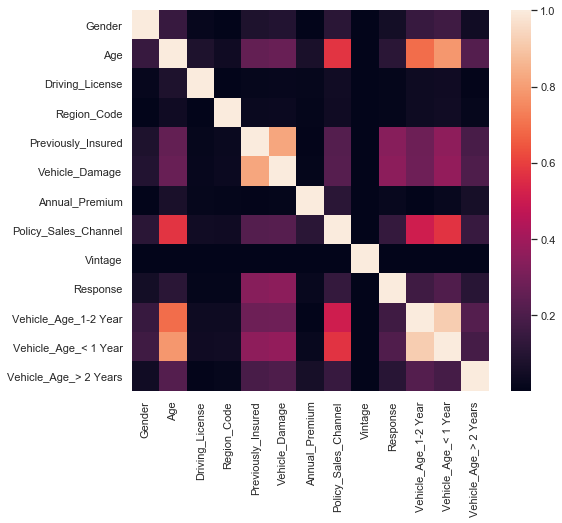

In [85]:
df = eliminate_corr_columns(df)

In [86]:
df_corr = df.corr()

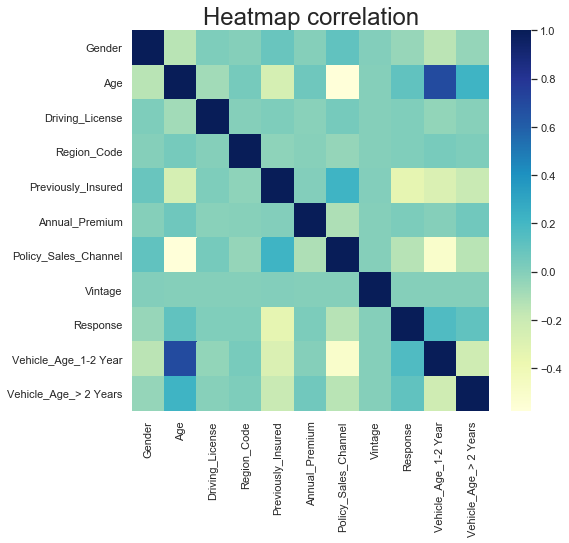

In [87]:
sns.heatmap(df_corr, cmap='YlGnBu')
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [88]:
rank = df_corr['Response']
df_rank = pd.DataFrame(rank)
df_rank = np.abs(df_rank).sort_values(by='Response',ascending=False)
df_rank.dropna(inplace=True)

In [89]:
df_rank

Response
Response               1.000000
Previously_Insured     0.341170
Vehicle_Age_1-2 Year   0.164317
Policy_Sales_Channel   0.139042
Age                    0.111147
Vehicle_Age_> 2 Years  0.109300
Gender                 0.052440
Annual_Premium         0.022575
Region_Code            0.010570
Driving_License        0.010155
Vintage                0.001050

In [90]:
df.shape

(381109, 11)

In [91]:
df_train_all = df[0:200000]
df_train_1 = df_train_all[df_train_all['Response'] == 1]
df_train_0 = df_train_all[df_train_all['Response'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) + "-" + str(len(df_train_0)) 
      +" Loanee so we need to take a similar number of non-loanee")

In this dataset, we have 24534-175466 Loanee so we need to take a similar number of non-loanee


In [92]:
df_sample = df_train_0.sample(25000)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds. 
df_train = df_train.sample(frac=1) # Then we mix our dataset
df_train.shape

(49534, 11)

In [93]:
df_train.head()

Gender       Age  Driving_License  Region_Code  Previously_Insured  \
12791      0.0  0.092308              1.0     0.903846                 0.0   
100965     1.0  0.338462              1.0     0.538462                 0.0   
84944      1.0  0.061538              1.0     0.153846                 1.0   
50466      0.0  0.600000              1.0     0.538462                 0.0   
84597      0.0  0.292308              1.0     0.557692                 0.0   

        Annual_Premium  Policy_Sales_Channel   Vintage  Response  \
12791         0.074905              0.932099  0.422145       1.0   
100965        0.062666              0.154321  0.685121       1.0   
84944         0.075640              0.932099  0.546713       0.0   
50466         0.072501              0.154321  0.951557       0.0   
84597         0.032108              0.944444  0.394464       1.0   

        Vehicle_Age_1-2 Year  Vehicle_Age_> 2 Years  
12791                    0.0                    0.0  
100965                   1.0                    0.0  
84944                    0.0                    0.0  
50466                    1.0                    0.0  
84597                    1.0                    0.0

In [94]:
len(df_train[df_train['Response'] == 1]) / len(df_train)

0.4952961602131869

In [95]:
from scipy import stats
z = np.abs(stats.zscore(df))

In [96]:
z.max()

29.60533831879597

In [97]:
z.min()

2.2632804278634702e-05

In [98]:
threshold = 22.0
print(np.where(z>threshold))

(array([ 11319,  54743, 121687, 136304, 144282, 172257, 190154, 268332,
       275442, 281679, 347413]), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]))


In [99]:
df = df[(z < 20).all(axis=1)]

In [100]:
X_train = df_train.drop(['Response', 'Region_Code', 'Driving_License', 'Vintage'], axis=1)
y_train = df_train['Response']
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [101]:
df_test_all = df[200000:]

X_test_all = df_test_all.drop(['Response', 'Region_Code', 'Driving_License', 'Vintage'], axis=1)
y_test_all = df_test_all['Response']

X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
# Get the Accuracy score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [104]:
rf_clf = RandomForestClassifier(n_estimators = 500, min_samples_split = 8, 
                                max_depth = 8, class_weight= 'balanced', criterion='gini', random_state=42)

In [105]:
# Fitting the dataset
rf_clf.fit(X_train, y_train)
# nbClf.partial_fit(X_train, y_train, np.unique(y_train))
predictions = rf_clf.predict(X_test_all)
rf_clf_predict_proba = rf_clf.predict_proba(X_test_all)[:,1]

In [106]:
accuracy_score(y_test_all, predictions)

0.6873675685869914

In [107]:
print('Accuracy:',format(accuracy_score(y_test_all, predictions)*100))
print('AUC:',format(roc_auc_score(y_test_all, rf_clf_predict_proba)*100))
print('Classification_report:',classification_report(y_test_all, predictions))

Accuracy: 68.73675685869914
AUC: 83.92969384999043
Classification_report:               precision    recall  f1-score   support

         0.0       0.98      0.66      0.79    158182
         1.0       0.27      0.91      0.42     22100

    accuracy                           0.69    180282
   macro avg       0.62      0.78      0.60    180282
weighted avg       0.89      0.69      0.74    180282



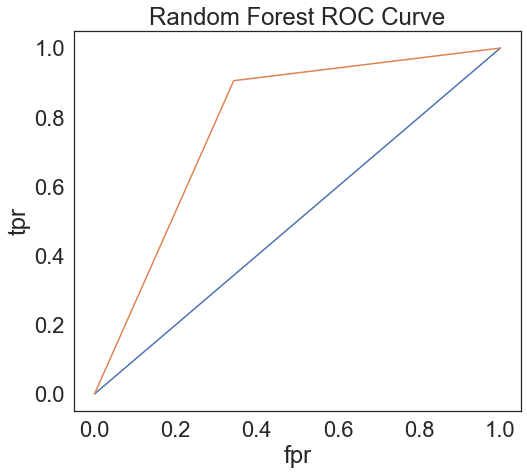

In [108]:
# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test_all, predictions)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC Curve')
plt.show()

In [109]:
y_pred = rf_clf.predict(X_test_all)
confusion_matrix(y_test_all,y_pred)

array([[103902,  54280],
       [  2082,  20018]])

In [110]:
pd.crosstab(y_test_all, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted     0.0    1.0     All
True                            
0.0        103902  54280  158182
1.0          2082  20018   22100
All        105984  74298  180282

In [111]:
rf_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [112]:
testDF = pd.read_csv('test.csv')
testDF.head()

id Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  381110   Male   25                1         11.0                   1   
1  381111   Male   40                1         28.0                   0   
2  381112   Male   47                1         28.0                   0   
3  381113   Male   24                1         27.0                   1   
4  381114   Male   27                1         28.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0    < 1 Year             No         35786.0                 152.0       53  
1    1-2 Year            Yes         33762.0                   7.0      111  
2    1-2 Year            Yes         40050.0                 124.0      199  
3    < 1 Year            Yes         37356.0                 152.0      187  
4    < 1 Year             No         59097.0                 152.0      297

In [113]:
testDF.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [114]:
mapValue = {
    'Male':0,
    'Female':1
}

testDF["Gender"] = testDF['Gender'].map(mapValue).astype(int)

mapValue1 = {
    'No':0,
    'Yes':1
}

testDF["Vehicle_Damage"] = testDF['Vehicle_Damage'].map(mapValue1).astype(int)
testDF.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  381110       0   25                1         11.0                   1   
1  381111       0   40                1         28.0                   0   
2  381112       0   47                1         28.0                   0   
3  381113       0   24                1         27.0                   1   
4  381114       0   27                1         28.0                   1   

  Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0    < 1 Year               0         35786.0                 152.0       53  
1    1-2 Year               1         33762.0                   7.0      111  
2    1-2 Year               1         40050.0                 124.0      199  
3    < 1 Year               1         37356.0                 152.0      187  
4    < 1 Year               0         59097.0                 152.0      297

In [115]:
testDF=pd.concat([testDF,pd.get_dummies(testDF['Vehicle_Age'],prefix='Vehicle_Age')],axis=1).drop(['Vehicle_Age'],axis=1)
testDF.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  381110       0   25                1         11.0                   1   
1  381111       0   40                1         28.0                   0   
2  381112       0   47                1         28.0                   0   
3  381113       0   24                1         27.0                   1   
4  381114       0   27                1         28.0                   1   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0               0         35786.0                 152.0       53   
1               1         33762.0                   7.0      111   
2               1         40050.0                 124.0      199   
3               1         37356.0                 152.0      187   
4               0         59097.0                 152.0      297   

   Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  
0                     0                     1                      0  
1                     1                     0                      0  
2                     1                     0                      0  
3                     0                     1                      0  
4                     0                     1                      0

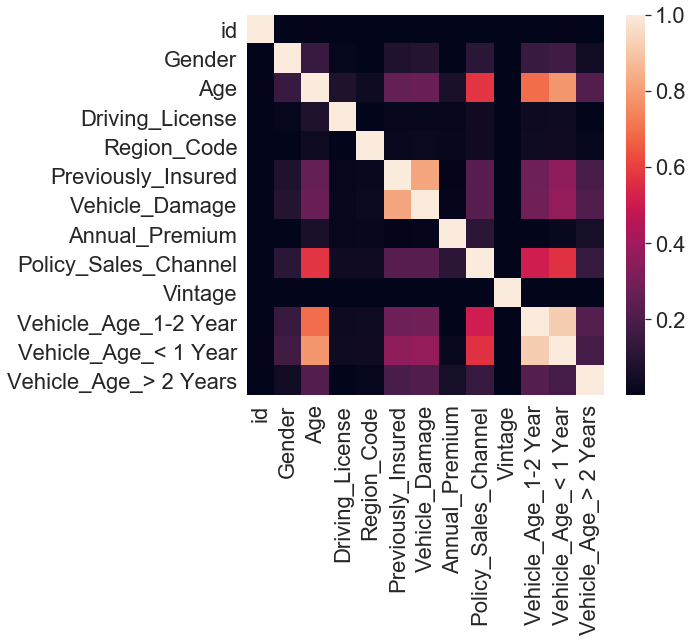

In [116]:
dtestDFf = eliminate_corr_columns(testDF)

In [117]:
testDF.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'],
      dtype='object')

In [118]:
testDF.drop(['id', 'Region_Code', 'Driving_License', 'Vintage'], axis=1, inplace=True)

In [119]:
testDF = testDF[['Gender', 'Age', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_> 2 Years']]

In [120]:
df_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_> 2 Years'],
      dtype='object')

In [121]:
X_test_all = np.asarray(testDF)

In [122]:
prediction = rf_clf.predict(X_test_all)

In [123]:
prediction

array([0., 1., 1., ..., 0., 0., 0.])

In [124]:
tDF = pd.read_csv('test.csv')

In [125]:
id_column_vlues = tDF['id']
id_column_vlues

0         381110
1         381111
2         381112
3         381113
4         381114
           ...  
127032    508142
127033    508143
127034    508144
127035    508145
127036    508146
Name: id, Length: 127037, dtype: int64

In [126]:
type(id_column_vlues)

pandas.core.series.Series

In [127]:
len(id_column_vlues)

127037

In [128]:
len(prediction)

127037

In [129]:
type(prediction)

numpy.ndarray

In [130]:
pred_series = pd.Series(prediction, name='Response')
len(pred_series)

127037

In [131]:
id_series = pd.Series(id_column_vlues, name='id')
len(id_series)

127037

In [132]:
opDF = pd.concat([id_series, pred_series], axis=1)
opDF.head()

id  Response
0  381110       0.0
1  381111       1.0
2  381112       1.0
3  381113       0.0
4  381114       0.0

In [133]:
opDF.set_index('id', inplace=True)
opDF.head()

Response
id              
381110       0.0
381111       1.0
381112       1.0
381113       0.0
381114       0.0

In [134]:
opDF.to_csv('Random_Forest.csv', sep=',', encoding='utf-8')